In [2]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Cargar datos
df_employees = pd.read_csv('data//df_employees.csv')

### **Análisis exploratorio**

In [6]:
# Datos faltantes
df_employees.isnull().sum()

EmployeeID                 0
Year                       0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
JobLevel                   0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
retirementType             0
resignationReason          0
Attrition                  0
dtype: int64

In [7]:
# Descripción variables númericas
df_employees._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,8820.0,2591.500000,1812.892315,1.0,1200.75,2401.0,3601.0,8813.0
Year,8820.0,2015.500000,0.500028,2015.0,2015.00,2015.5,2016.0,2016.0
Age,8820.0,36.923810,9.132783,18.0,30.00,36.0,43.0,60.0
DistanceFromHome,8820.0,9.192517,8.104566,1.0,2.00,7.0,14.0,29.0
Education,8820.0,2.912925,1.023875,1.0,2.00,3.0,4.0,5.0
JobLevel,8820.0,2.063946,1.106626,1.0,1.00,2.0,3.0,5.0
MonthlyIncome,8820.0,65029.312925,47066.219877,10090.0,29110.00,49190.0,83800.0,199990.0
NumCompaniesWorked,8820.0,2.691837,2.493771,0.0,1.00,2.0,4.0,9.0
PercentSalaryHike,8820.0,15.209524,3.658900,11.0,12.00,14.0,18.0,25.0
StockOptionLevel,8820.0,0.793878,0.851835,0.0,0.00,1.0,1.0,3.0


Se evidencia que la variable "MonthlyIncome" tiene una desviación estándar alta, esto refleja posibles diferencias significativas en los niveles salariales de cada uno de los empleados, esto podría verse reflejado posteriormete en los analisis descriptivos.



In [8]:
# Se renombra el dataframe
df = df_employees

### **Datos duplicados**

In [9]:
# Identificación de filas duplicadas
filas_duplicadas = df.duplicated()

# Contar el número de filas duplicadas
cantidad_duplicados = filas_duplicadas.sum()
cantidad_duplicados

0

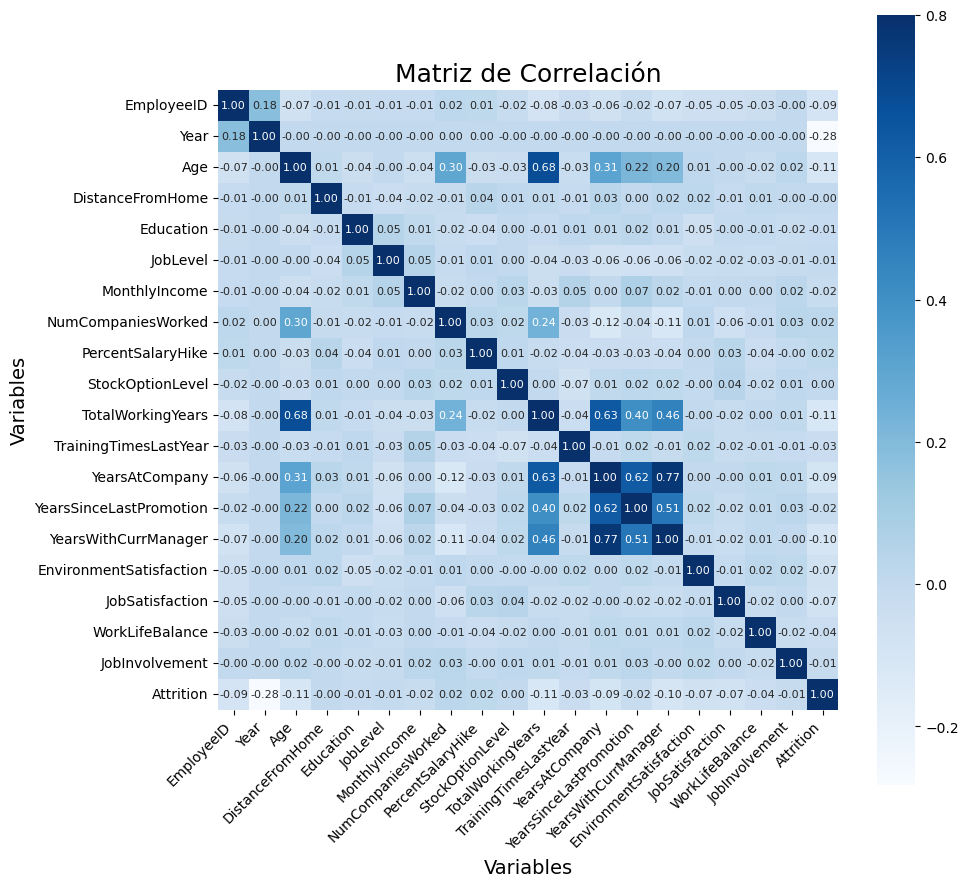

In [10]:
#Matriz de correlación 

# Selección de columnas numéricas
columnas_numericas = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Filtro de DataFrame a las variables numéricas
df_numerico = df[columnas_numericas]

# Calcular la matriz de correlación
corrmat = df_numerico.corr()

# Tamaño 
f, ax = plt.subplots(figsize=(10, 10)) 

# Mapa de calor
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, annot_kws={"fontsize": 8}, fmt=".2f", cmap='Blues')

# Etiqueta de los ejes
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title('Matriz de Correlación', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

plt.show()


De la matriz de correlación podemos observar que hay muchas variables que no tienen una fuerte correlación entre si, sin embargo, hay una alta correlación entre 'Age' y 'TotalWorkingYears', esto tiene sentido ya que entre más años tenga un empleado, más es el total de años trabajados dentro de la empresa. También vemos que hay una alta correlación entre las variables 'YearsAtCompany' y 'YearsWithCurrManager', en el momento no es relevante ya que en el analisis se tiene de linea temporal un año, al igual que las variables 'YearsSinceLastPromotion'y 'YearsAtCompany'. Por lo que estas variables deben ser tratadas posteriormente para evitar la multicolinealidad.

### Exploración de variables


In [11]:
# Eliminación de las columnas 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager'
df = df_employees.drop(['TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager'], axis=1)

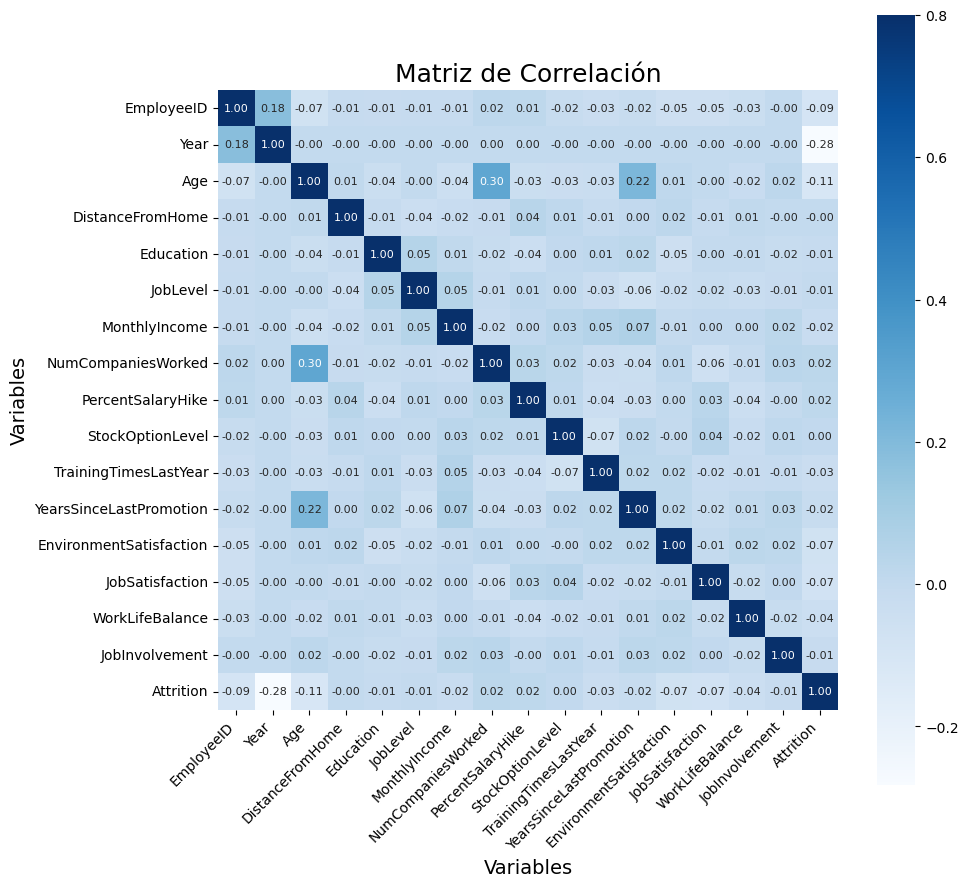

In [12]:
# Nueva matriz de correlación 

# Selección de columnas numéricas
columnas_numericas = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Filtro de DataFrame a las variables numéricas
df_numerico = df[columnas_numericas]

# Calcular la matriz de correlación
corrmat = df_numerico.corr()

# Tamaño 
f, ax = plt.subplots(figsize=(10, 10)) 

# Mapa de calor
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, annot_kws={"fontsize": 8}, fmt=".2f", cmap='Blues')

# Etiqueta de los ejes
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title('Matriz de Correlación', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

plt.show()


Se realiza nuevamente la matriz de correlación para verificar que se hayan eliminado las altas correlaciones.

In [13]:
# Revisión de la variable objetivo "Attrition" 
df['Attrition'].describe()
df['Attrition'].unique()
df['Attrition'].nunique()
df['Attrition'].value_counts()

0    8170
1     650
Name: Attrition, dtype: int64

In [14]:
df

,EmployeeID,Year,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,...,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,retirementType,resignationReason,Attrition
0,1,2015,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Married,...,0,6,0,3,4,2,3,Not Applicable,Not Applicable,0
1,2,2015,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Single,...,1,3,1,3,2,4,2,Resignation,Others,1
2,3,2015,32,Travel_Frequently,Research & Development,17,4,Other,4,Married,...,3,2,0,2,2,1,3,Not Applicable,Not Applicable,0
3,4,2015,38,Non-Travel,Research & Development,2,5,Life Sciences,3,Married,...,3,5,7,4,4,3,2,Not Applicable,Not Applicable,0
4,5,2015,32,Travel_Rarely,Research & Development,10,1,Medical,1,Single,...,2,2,0,4,1,3,3,Not Applicable,Not Applicable,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,8792,2016,29,Travel_Rarely,Research & Development,7,1,Life Sciences,1,Single,...,0,2,0,3,4,2,3,Not Applicable,Not Applicable,0
8816,8797,2016,33,Travel_Rarely,Sales,11,4,Marketing,1,Married,...,0,2,0,3,4,1,2,Not Applicable,Not Applicable,0
8817,8799,2016,33,Travel_Rarely,Sales,1,3,Life Sciences,2,Married,...,0,2,1,1,1,4,3,Not Applicable,Not Applicable,0
8818,8802,2016,32,Travel_Rarely,Sales,23,1,Life Sciences,3,Single,...,0,2,1,4,3,1,3,Not Applicable,Not Applicable,0


**VARIABLE OBJETIVO**

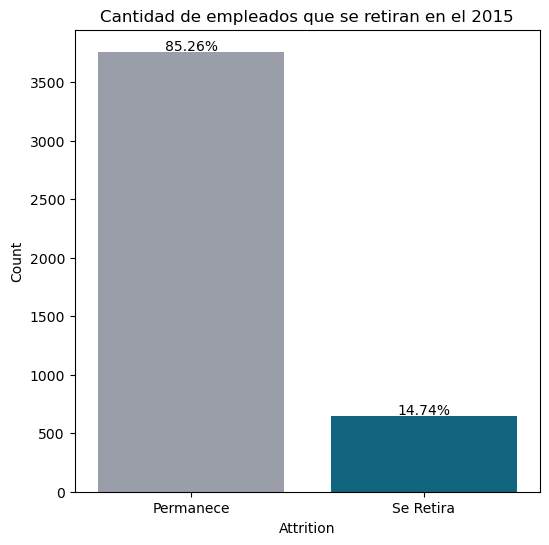

In [42]:
# Histograma de la variable objetivo

# Crea el gráfico de barras
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=df[df['Year'] == 2015], x='Attrition', palette=['#979dac', '#006e90'])

plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Cantidad de empleados que se retiran en el 2015')

# Configura los ticks y etiquetas
ax.set_xticks([0, 1])
ax.set_xticklabels(['Permanece', 'Se Retira'])

df_2015 = df[df['Year'] == 2015]

# Calcula las frecuencias y porcentajes
counts = df_2015['Attrition'].value_counts()
total = len(df_2015)
percentages = (counts / total * 100).reindex([0, 1], fill_value=0)

# Añade los porcentajes al gráfico
for tick in [0, 1]:
    count = counts.get(tick, 0)
    percentage = percentages.get(tick, 0)
    ax.text(tick, count + 10, f'{percentage:.2f}%', ha='center', color='black')

plt.show()

Para la visualización de los datos, se realiza un filtro por año del 2015, ya que en este año se tienen los registros de ambas categorias del 'Attrition', y se evidencia un claro desbalance entre las clases, en donde la cantidad de empleados que permanecen es del 85.3% contrastado con el 14.7% que se retiraran para el 2016.

**Información General sobre los Empleados**

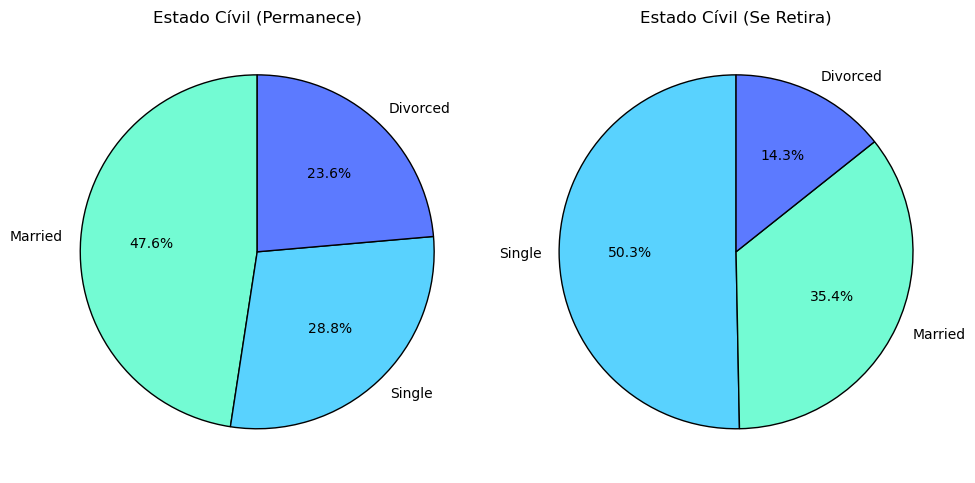

In [31]:
# Configurar el tamaño de la figura y crear subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico circular para MaritalStatus de Attrition = 0
df_2015[df_2015['Attrition'] == 0]['MaritalStatus'].value_counts().plot.pie(
    ax=axes[0], autopct='%1.1f%%', colors=['#73fbd3', '#59d2fe', '#5c7aff'], startangle=90, wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('Estado Cívil (Permanece)')
axes[0].set_ylabel('')

# Gráfico circular para MaritalStatus de Attrition = 1
df_2015[df_2015['Attrition'] == 1]['MaritalStatus'].value_counts().plot.pie(
    ax=axes[1], autopct='%1.1f%%', colors=['#59d2fe', '#73fbd3', '#5c7aff'], startangle=90, wedgeprops={'edgecolor': 'black'}
)
axes[1].set_title('Estado Cívil (Se Retira)')
axes[1].set_ylabel('')

# Ajustar el espaciado
plt.tight_layout()
plt.show()


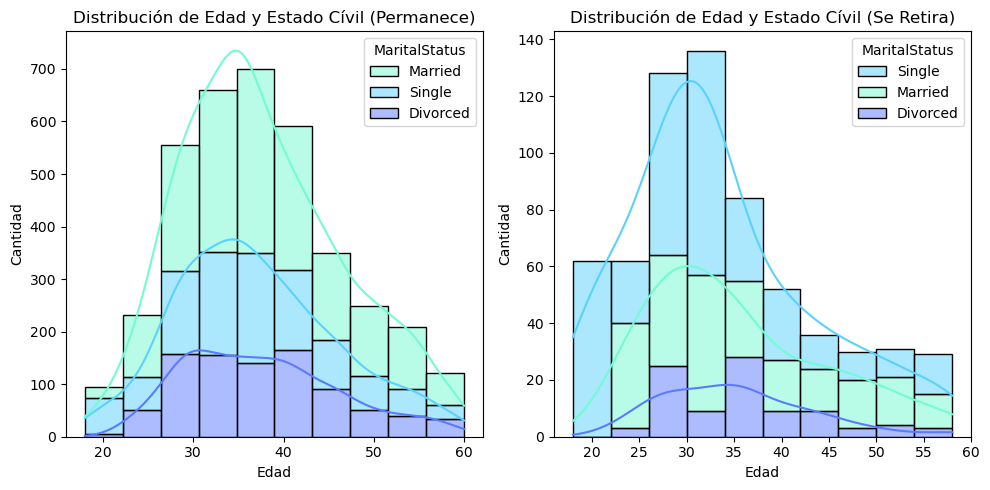

In [33]:
# Configurar el tamaño de la figura y crear subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de barras con densidad para Edad y MaritalStatus (Permanece)
sns.histplot(
    data=df_2015[df_2015['Attrition'] == 0], x='Age', hue='MaritalStatus',
    bins=10, palette=['#73fbd3', '#59d2fe', '#5c7aff'], multiple='stack', ax=axes[0], kde=True
)
axes[0].set_title('Distribución de Edad y Estado Cívil (Permanece)')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Cantidad')

# Gráfico de barras con densidad para Edad y MaritalStatus (Se Retira)
sns.histplot(
    data=df_2015[df_2015['Attrition'] == 1], x='Age', hue='MaritalStatus',
    bins=10, palette=['#59d2fe', '#73fbd3', '#5c7aff'], multiple='stack', ax=axes[1], kde=True
)
axes[1].set_title('Distribución de Edad y Estado Cívil (Se Retira)')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Cantidad')

# Ajustar el espaciado
plt.tight_layout()
plt.show()

**Estado cívil:** Teniendo en cuenta el estado cívil de los empleados, se evidencia un cambio significativo dependiente si es Casado o Soltero. Se podría suponer que los empleados que son solteros tienden a retirarse en mayor proporción, esto debido a una suposición, y es que tienen menos responsabilidades y pueden cambiar más facilmente de empleo.

Comparando las variables de estado cívil con la edad, se puede ver que los empleados que se retiran en el rango de 25 a 35 años tienden a renunciar en mayor proporción cuando son solteros, además de mostrar una clara diferencia entre el estado cívil de los casados y solteros siendo el soltero más propenso a reitrarse. Con esta información seguimos sosteniendo la suposición relacionada con las responsabilidades adquiridas. 

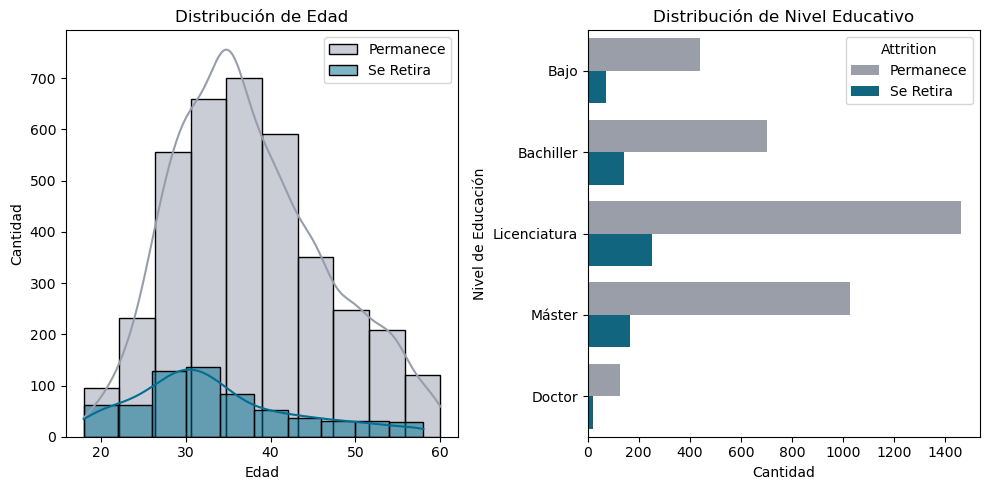

In [43]:
# Configurar el tamaño de la figura y crear subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de barras superpuestas para la Edad
sns.histplot(
    data=df_2015[df_2015['Attrition'] == 0], x='Age', bins=10, color='#979dac', label='Permanece', ax=axes[0], kde=True
)
sns.histplot(
    data=df_2015[df_2015['Attrition'] == 1], x='Age', bins=10, color='#006e90', label='Se Retira', ax=axes[0], kde=True
)
axes[0].set_title('Distribución de Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Cantidad')
axes[0].legend()

# Gráfico de barras agrupadas para Educación
sns.countplot(
    data=df_2015, y='Education', hue='Attrition', palette={0: '#979dac', 1: '#006e90'}, ax=axes[1]
)
axes[1].set_title('Distribución de Nivel Educativo')
axes[1].set_xlabel('Cantidad')
axes[1].set_ylabel('Nivel de Educación')

# Reemplazar las etiquetas del eje Y con las descripciones
axes[1].set_yticklabels(['Bajo', 'Bachiller', 'Licenciatura', 'Máster', 'Doctor'])

# Personalizar la leyenda
handles, labels = axes[1].get_legend_handles_labels()
labels = ['Permanece', 'Se Retira']
axes[1].legend(handles, labels, title='Attrition')

# Ajustar el espaciado
plt.tight_layout()
plt.show()


Con respecto a la **Edad**, se podría decir que los empleados que permanencen muestran una distribución normal, con un leve sesgo hacia la derecha, mientras que los empleados que renuncian tienen mayor concentración de los datos entre los 25 y 35 años, mostrando un sesgo hacia la derecha más marcado.

Por otro lado, el **Nivel educativo** no parece ser una variable significativa, ya que se mantienen las proporciones entonces no se podría inferir si un empleado renuncia o se despide dependiendo de éste nivel

In [41]:
#Corrección

df_2015['BusinessTravel'].describe()
df_2015['BusinessTravel'].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

**Información sobre el empleo**

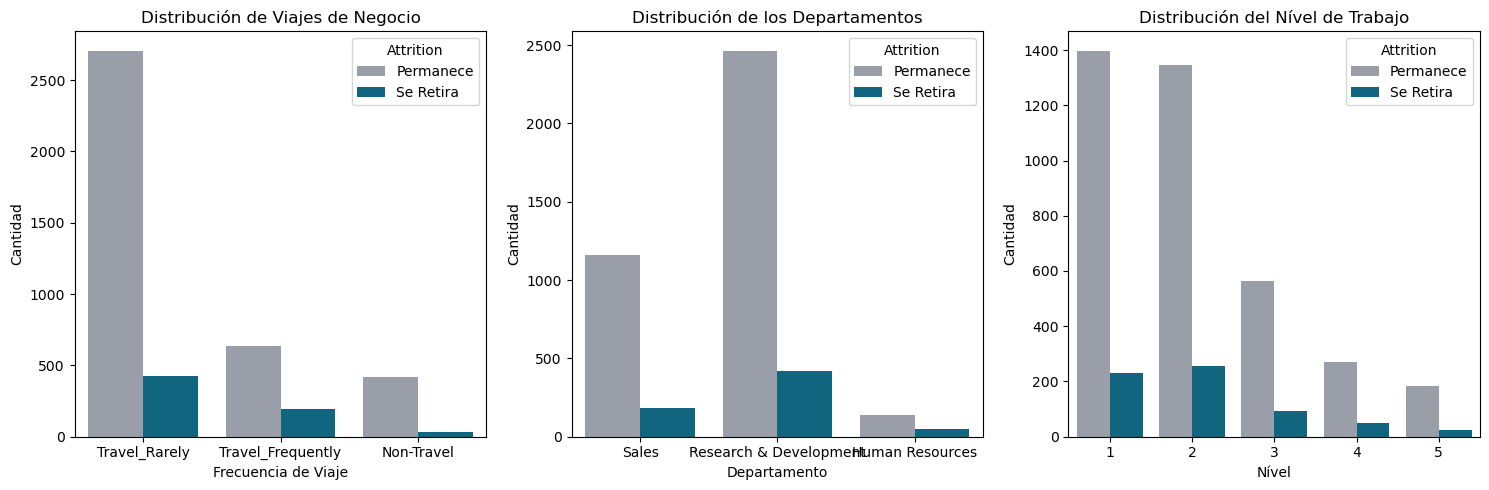

In [47]:
# Configurar el tamaño de la figura y crear subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico de barras agrupadas para BusinessTravel
sns.countplot(data=df_2015, x='BusinessTravel', hue='Attrition', palette=['#979dac', '#006e90'], ax=axes[0])
axes[0].set_title('Distribución de Viajes de Negocio')
axes[0].set_xlabel('Frecuencia de Viaje')
axes[0].set_ylabel('Cantidad')
axes[0].legend(title='Attrition', labels=['Permanece', 'Se Retira'])

# Gráfico de barras agrupadas para Department
sns.countplot(data=df_2015, x='Department', hue='Attrition', palette=['#979dac', '#006e90'], ax=axes[1])
axes[1].set_title('Distribución de los Departamentos')
axes[1].set_xlabel('Departamento')
axes[1].set_ylabel('Cantidad')
axes[1].legend(title='Attrition', labels=['Permanece', 'Se Retira'])

# Gráfico de barras agrupadas para Department
sns.countplot(data=df_2015, x='JobLevel', hue='Attrition', palette=['#979dac', '#006e90'], ax=axes[2])
axes[2].set_title('Distribución del Nível de Trabajo')
axes[2].set_xlabel('Nível')
axes[2].set_ylabel('Cantidad')
axes[2].legend(title='Attrition', labels=['Permanece', 'Se Retira'])

# Ajustar el espaciado
plt.tight_layout()
plt.show()


In [68]:
business_travel_counts = df_2015.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True).unstack() * 100
business_travel_counts.columns = ['Permanece (%)', 'Se Retira (%)']
business_travel_counts

,Permanece (%),Se Retira (%)
BusinessTravel,,
Non-Travel,92.222222,7.777778
Travel_Frequently,76.774970,23.225030
Travel_Rarely,86.513263,13.486737


In [70]:
department_counts = df_2015.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100
department_counts.columns = ['Permanece (%)', 'Se Retira (%)']
department_counts

,Permanece (%),Se Retira (%)
Department,,
Human Resources,73.015873,26.984127
Research & Development,85.501214,14.498786
Sales,86.472347,13.527653


In [93]:
department_counts = df_2015.groupby('JobLevel')['Attrition'].value_counts(normalize=True).unstack() * 100
department_counts.columns = ['Permanece (%)', 'Se Retira (%)']
department_counts

,Permanece (%),Se Retira (%)
JobLevel,,
1,85.819521,14.180479
2,84.019975,15.980025
3,86.085627,13.914373
4,84.591195,15.408805
5,88.888889,11.111111


Con respecto a la información de los **Viajes de negocio**, la proporción se mentiene, sin embargo, la cantidad de empleados que se retiran es más alto cuando viajan frecuentemente con un porcentaje de más del 23%, seguido por los que viajan raramente con más del 13%.  

Ahora, para los **Departamentos**, en donde se presentan más retiros es en el departamento de Recursos Humanos con más del 26% seguido del departamento del R&D con un 14,4% y finalizando con el departamento de ventas que tiene el 13,5%

Finalmente para el **Nivel de trabajo**, los porcentajes se mantienen similares variando entre 2% y 3% entre ellos, por lo que tampoco se considera una variable influyente hasta el momento.

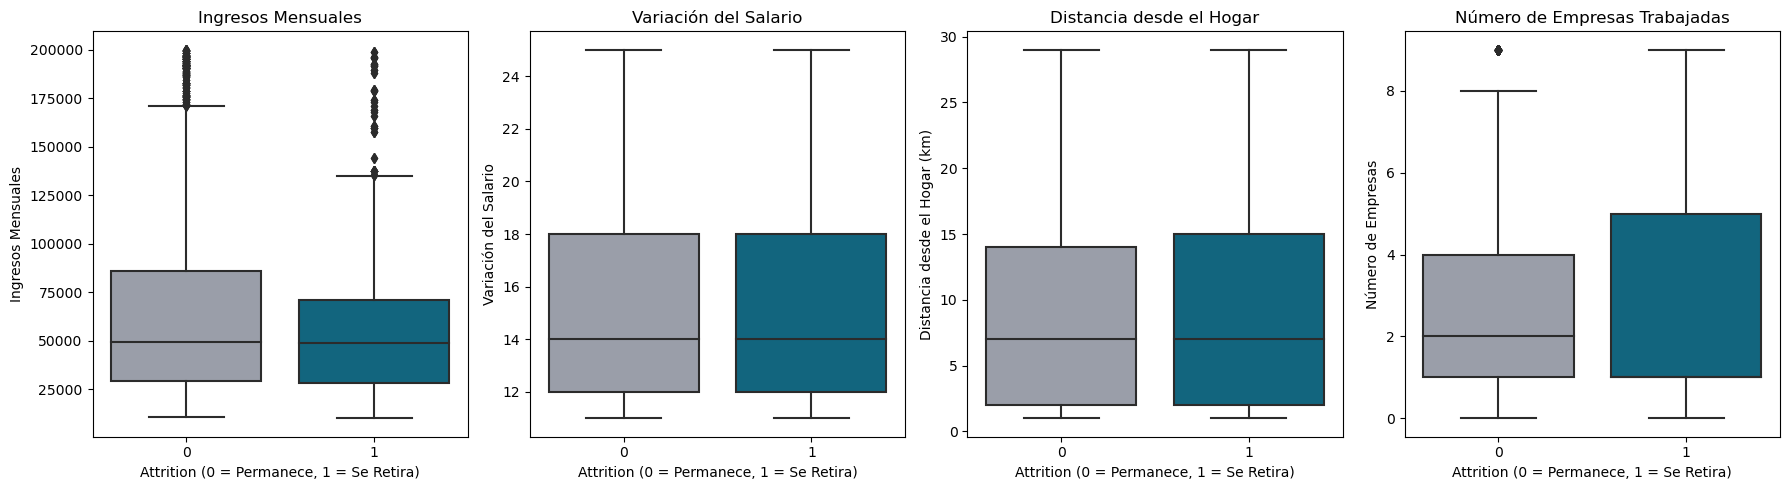

In [45]:
# Crear el gráfico de violín para comparar los ingresos mensuales según Attrition
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Gráfico de caja para 'MonthlyIncome'
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_2015, palette=['#979dac', '#006e90'], ax=axes[0])
axes[0].set_title('Ingresos Mensuales')
axes[0].set_xlabel('Attrition (0 = Permanece, 1 = Se Retira)')
axes[0].set_ylabel('Ingresos Mensuales')

# Gráfico de caja para 'NumCompaniesWorked'
sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=df_2015, palette=['#979dac', '#006e90'], ax=axes[3])
axes[3].set_title('Número de Empresas Trabajadas')
axes[3].set_xlabel('Attrition (0 = Permanece, 1 = Se Retira)')
axes[3].set_ylabel('Número de Empresas')

# Gráfico de caja para 'DistanceFromHome'
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df_2015, palette=['#979dac', '#006e90'], ax=axes[2])
axes[2].set_title('Distancia desde el Hogar')
axes[2].set_xlabel('Attrition (0 = Permanece, 1 = Se Retira)')
axes[2].set_ylabel('Distancia desde el Hogar (km)')

# Gráfico de caja para 'PercentSalaryHike'
sns.boxplot(x='Attrition', y='PercentSalaryHike', data=df_2015, palette=['#979dac', '#006e90'], ax=axes[1])
axes[1].set_title('Variación del Salario')
axes[1].set_xlabel('Attrition (0 = Permanece, 1 = Se Retira)')
axes[1].set_ylabel('Variación del Salario')

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Ingresos mensuales:** Se puede apreciar que los que permanecen en la empresa suelen tener salarios más altos, mientras que para los que se retiran los salarios eran más bajos a diferencia de algunos datos atípicos que se pueden presentar.

**Variación del Salario:** En promedio, la mayoría de los empleados reciben un aumento salarial en el rango bajo 10-12% aproximadamente, lo que podría significar que las políticas de aumento salarial dentro de la empresa son conservadoras y existen algunos casos de aumentos mayores con un sesgo hacia los valores más bajos por lo que se podria suponer que los aumentos salariales mas alto no se hace mucho dentro de la empresa, ni tampoco afacta el impacto de la variable objetivo.

**Cantidad de empresas trabajadas:** Para la cantidad de empresas en las que ha trabajado, se aprecia que los que se mantienen tienen una media más baja, se deduce que es por la misma estabilidad que han tenido en el tiempo, mientras que para los que se retiran, se presenta más variabilidad supuesta también como la inestabilidad en las empresas.

**Distancia desde el hogar:** No se observan diferencias significativas en la distancia del hogar entre ambos grupos del Attrition, por lo que podriamos decir que la distancia del hogar no parece ser un factor determinante en la decisión de abandonar la empresa.

**Satisfacción de los empleados con respecto a su Ingreso Mensual**

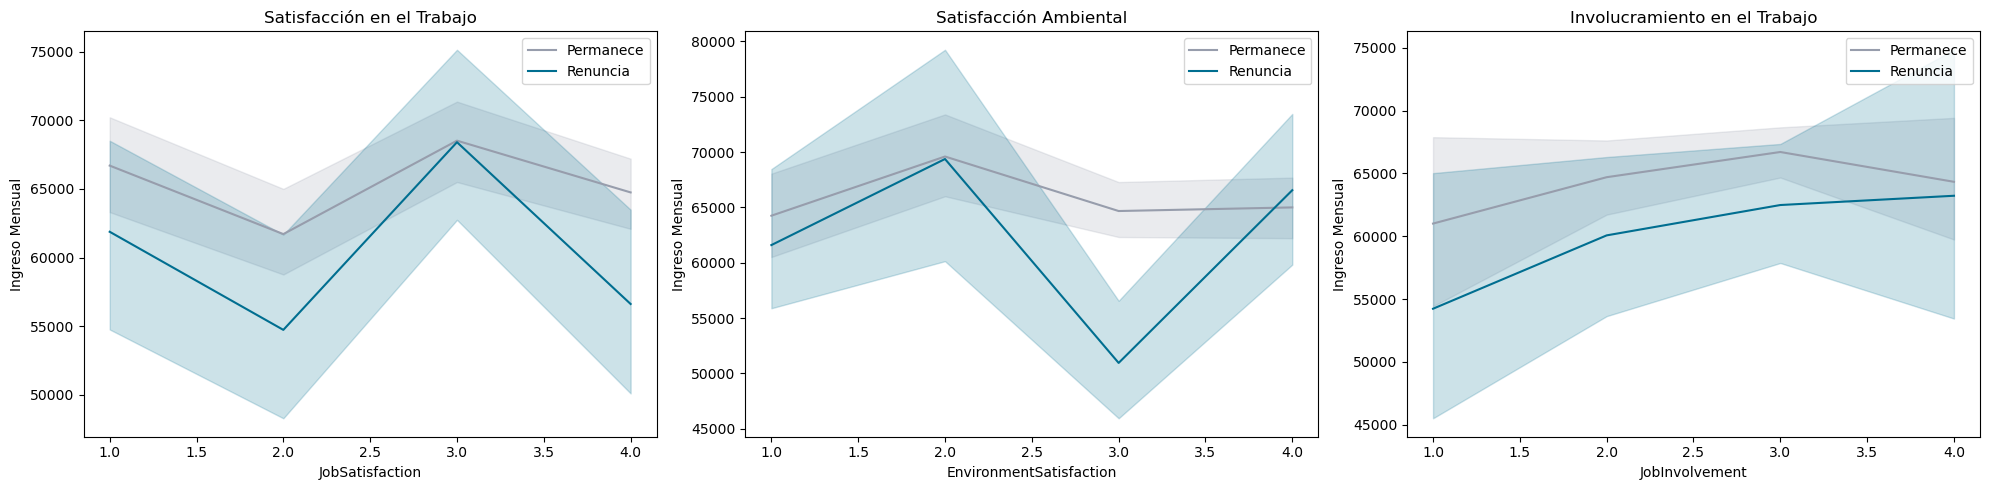

In [46]:
# Configurar el tamaño de la figura y crear subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 1 fila y 4 columnas

# Graficar para JobSatisfaction
sns.lineplot(x='JobSatisfaction', y='MonthlyIncome', data=df_2015[df_2015['Attrition'] == 0], ax=axes[0], label='Permanece', color='#979dac')
sns.lineplot(x='JobSatisfaction', y='MonthlyIncome', data=df_2015[df_2015['Attrition'] == 1], ax=axes[0], label='Renuncia', color='#006e90')
axes[0].set_title('Satisfacción en el Trabajo')
axes[0].set_xlabel('JobSatisfaction')
axes[0].set_ylabel('Ingreso Mensual')
axes[0].legend()

# Graficar para EnvironmentSatisfaction
sns.lineplot(x='EnvironmentSatisfaction', y='MonthlyIncome', data=df_2015[df_2015['Attrition'] == 0], ax=axes[1], label='Permanece', color='#979dac')
sns.lineplot(x='EnvironmentSatisfaction', y='MonthlyIncome', data=df_2015[df_2015['Attrition'] == 1], ax=axes[1], label='Renuncia', color='#006e90')
axes[1].set_title('Satisfacción Ambiental')
axes[1].set_xlabel('EnvironmentSatisfaction')
axes[1].set_ylabel('Ingreso Mensual')
axes[1].legend()

# Graficar para JobInvolvement
sns.lineplot(x='JobInvolvement', y='MonthlyIncome', data=df_2015[df_2015['Attrition'] == 0], ax=axes[2], label='Permanece', color='#979dac')
sns.lineplot(x='JobInvolvement', y='MonthlyIncome', data=df_2015[df_2015['Attrition'] == 1], ax=axes[2], label='Renuncia', color='#006e90')
axes[2].set_title('Involucramiento en el Trabajo')
axes[2].set_xlabel('JobInvolvement')
axes[2].set_ylabel('Ingreso Mensual')
axes[2].legend()

# Ajustar el espaciado
plt.tight_layout()
plt.show()

**Comportamiento de algunas encuestas con respecto a los ingresos:** Los empleados que peremanecen tienden a tener ingresos mensuales más altos y estables en comparación con aquellos que renuncian, por lo que eso puede mostrar una correlación con la calificación que se le da el Nivel de Satisfacción y el Involucramento Laboral.

**Información sobre los Retirados**

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14504\29734259.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


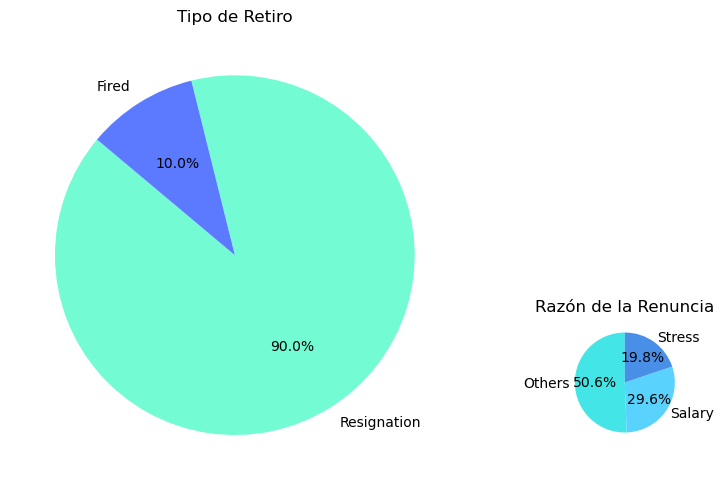

In [36]:
from matplotlib.patches import ConnectionPatch

# Filtrar los datos donde 'Attrition' es 1
df_attrition = df[df['Attrition'] == 1]

# Datos para el primer gráfico circular (retirementType)
retirement_counts = df_attrition['retirementType'].value_counts()
retirement_labels = retirement_counts.index
retirement_sizes = retirement_counts.values

# Crear la figura y los ejes para los gráficos
fig, ax1 = plt.subplots(figsize=(12, 5))

# Crear el gráfico circular para 'retirementType'
wedges, texts, autotexts = ax1.pie(retirement_sizes, labels=retirement_labels, autopct='%1.1f%%', startangle=140, colors=['#73fbd3', '#5c7aff'])
ax1.set_title('Tipo de Retiro')

# Verificar si hay 'Resignation' en los datos
if 'Resignation' in retirement_labels:
    # Filtrar los datos donde 'retirementType' es 'Resignation'
    df_resignation = df_attrition[df_attrition['retirementType'] == 'Resignation']
    
    # Datos para el gráfico circular secundario (resignationReason)
    resignation_counts = df_resignation['resignationReason'].value_counts()
    resignation_labels = resignation_counts.index
    resignation_sizes = resignation_counts.values
    
    # Crear un nuevo eje para el gráfico circular secundario
    inset_ax = fig.add_axes([0.7, 0.1, 0.25, 0.25])  # [left, bottom, width, height]
    inset_ax.pie(resignation_sizes, labels=resignation_labels, autopct='%1.1f%%', startangle=90, colors=['#44e5e7', '#59d2fe', '#4a8fe7'])
    inset_ax.set_title('Razón de la Renuncia')

plt.tight_layout()
plt.show()

Como lo muestra el gráfico el 90% de los empleados **Renuncian**, mientras que solo el 10% son despedidos, y las principales razones de la renuncia son a causa del **Salario** (29.6%), **Estrés** (19.8%), y se desconoce más del 50% de la información por la cual renuncian

In [115]:
df_attrition['retirementType'].describe()
df_attrition['retirementType'].value_counts()

Resignation    585
Fired           65
Name: retirementType, dtype: int64

In [116]:
df_attrition['resignationReason'].describe()
df_attrition['resignationReason'].value_counts()

Others            296
Salary            173
Stress            116
Not Applicable     65
Name: resignationReason, dtype: int64

In [119]:
df_attrition['resignationReason'].describe()
df_attrition['resignationReason'].value_counts()

Others            296
Salary            173
Stress            116
Not Applicable     65
Name: resignationReason, dtype: int64

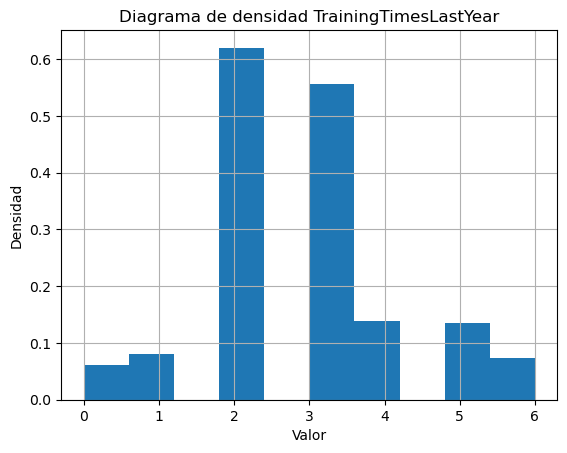

In [48]:
# Diagrama de densidad de TrainingTimesLastYear
plt.hist(df_2015['TrainingTimesLastYear'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad TrainingTimesLastYear')
plt.grid(True)
plt.show() 

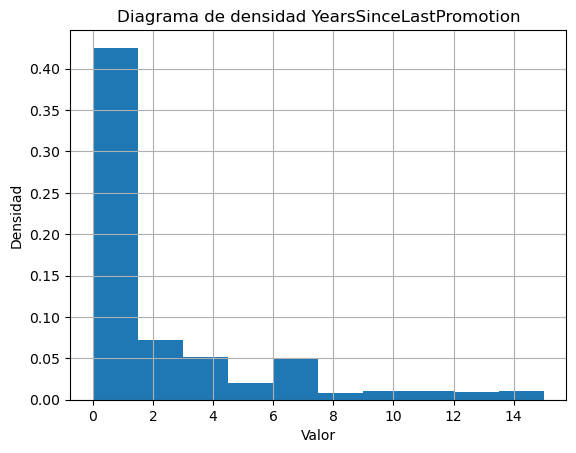

In [49]:
# Diagrama de densidad de YearsSinceLastPromotion
plt.hist(df_2015['YearsSinceLastPromotion'], density=True) 

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad YearsSinceLastPromotion')
plt.grid(True)
plt.show()

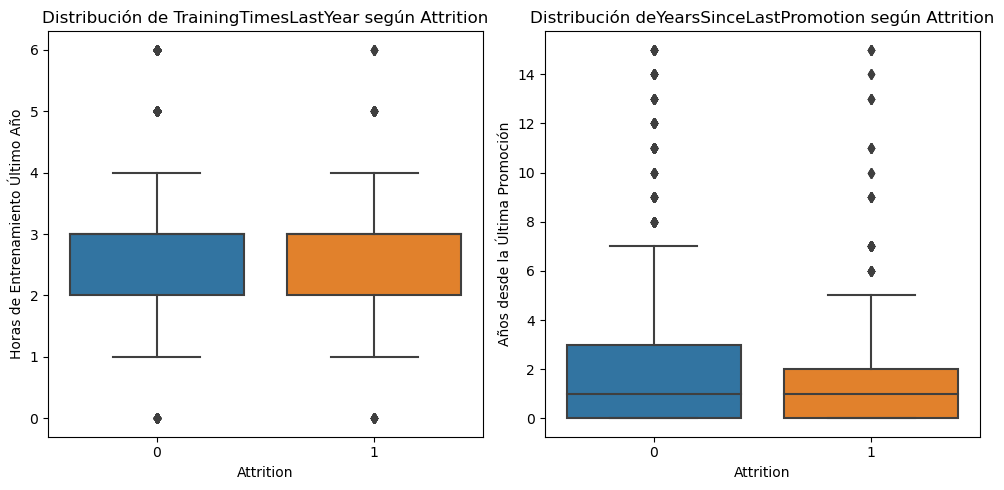

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Horas de TrainingTimesLastYear
sns.boxplot(x='Attrition', y='TrainingTimesLastYear', data=df_2015, ax=axes[0])
axes[0].set_title('Distribución de TrainingTimesLastYear según Attrition')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Horas de Entrenamiento Último Año')

# YearsSinceLastPromotion
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df_2015, ax=axes[1])
axes[1].set_title('Distribución deYearsSinceLastPromotion según Attrition')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Años desde la Última Promoción')



plt.tight_layout()
plt.show()


TrainingTimesLastYear: La mediana es similar en ambos grupos, también hay algunos outliers en ambos grupos, pero estos parecen ser simétricos, indicando que el número de horas de entrenamiento no muestra una diferencia significativa con respecto a la retención de empleados.

YearsSinceLastPromotion: La mediana de años desde la última promoción es similar entre los dos grupos, pero ligeramente mayor la de los que permanecen 


In [43]:
# Exportación de los datos para su posterior uso
df.to_csv('data/df_employees_models.csv', index=False)